## 7.2 교차상관분석 - CCF 분석


### 예제 1. 폐질환 사망자수 데이터

In [1]:
library(datasets)
data(fdeaths)
data(mdeaths)

Warning message in data(fdeaths):
“data set ‘fdeaths’ not found”
Warning message in data(mdeaths):
“data set ‘mdeaths’ not found”


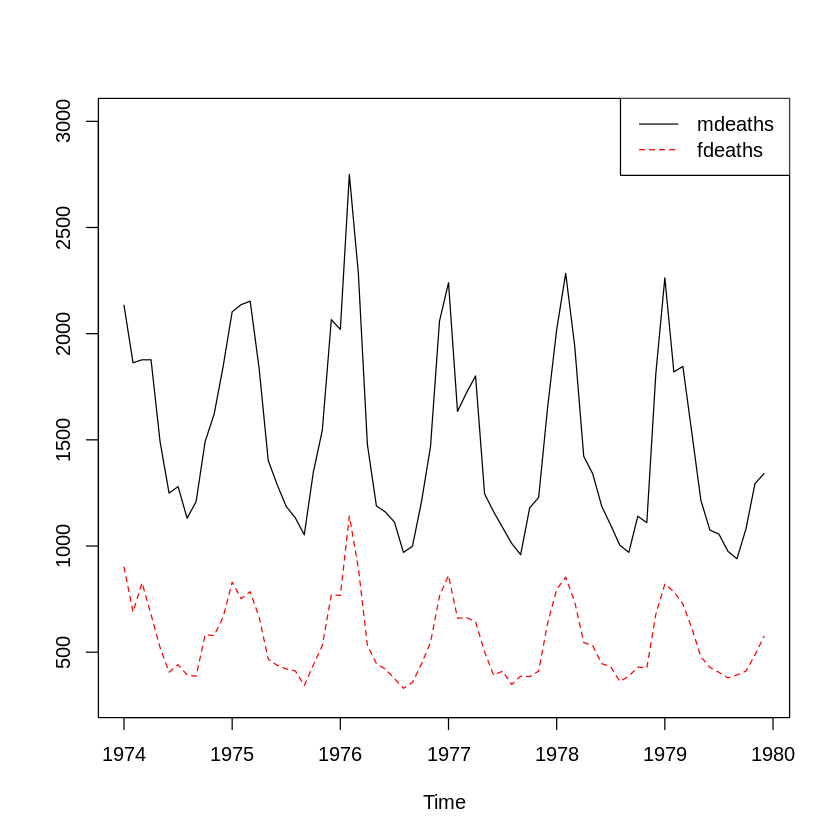

In [2]:
plot(mdeaths, ylim = c(300, 3000), ylab = "")
lines(fdeaths, lty = 2, col = "red")
legend("topright", c("mdeaths", "fdeaths"), col = c("black", "red"), lty = c(1, 2))

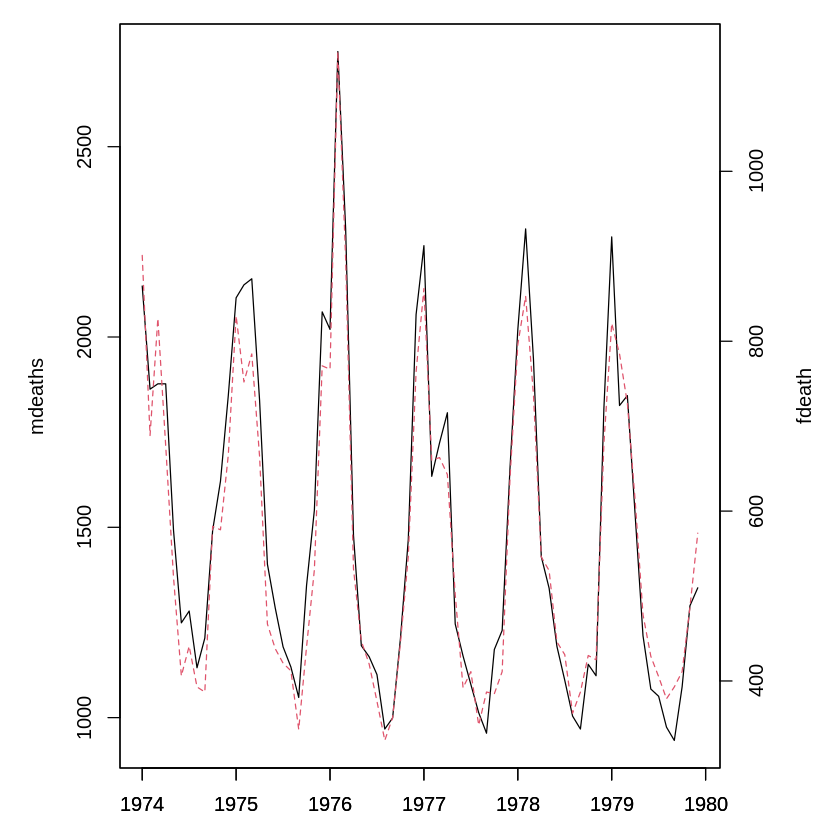

In [3]:
par(mar = c(3, 5, 1, 5))
plot(mdeaths)
par(new = TRUE)
plot(fdeaths, yaxt = "n", ylab = "", col = 2, lty = 2)
axis(4)
mtext("fdeath", side = 4, line = 3)

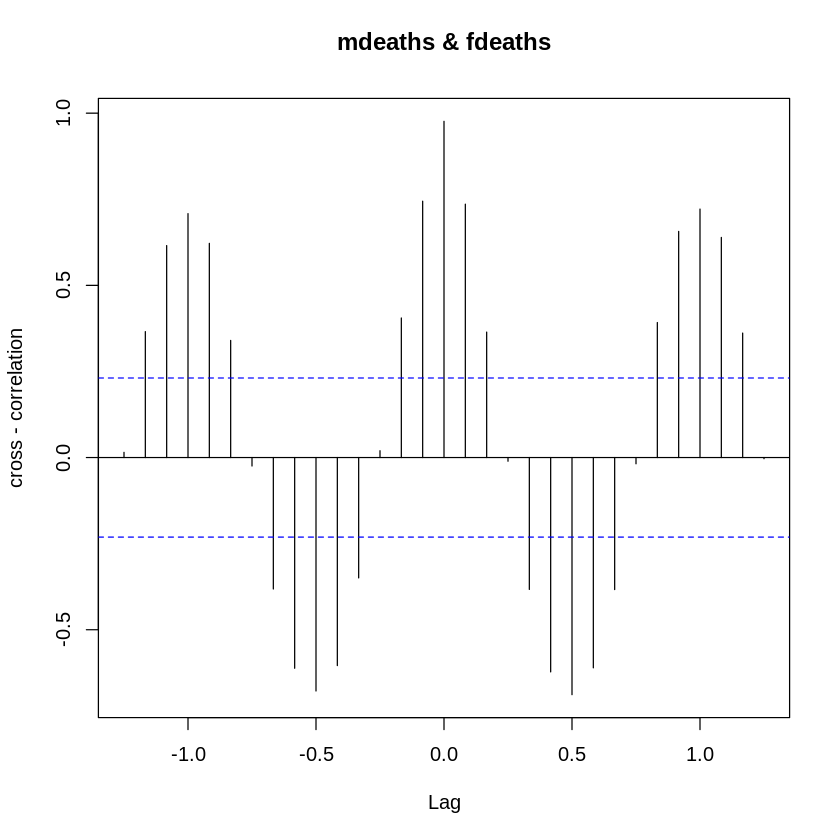

In [4]:
par(mar = c(5.1, 4.1, 4.1, 2.1))
ccf(mdeaths, fdeaths, ylab = "cross - correlation")

+ time lag = 0일 때 두 시계열 간의 상관이 가장 높게 나타남. 즉, 두 변수 간의 관계를 동행변수로 볼 수 있음

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



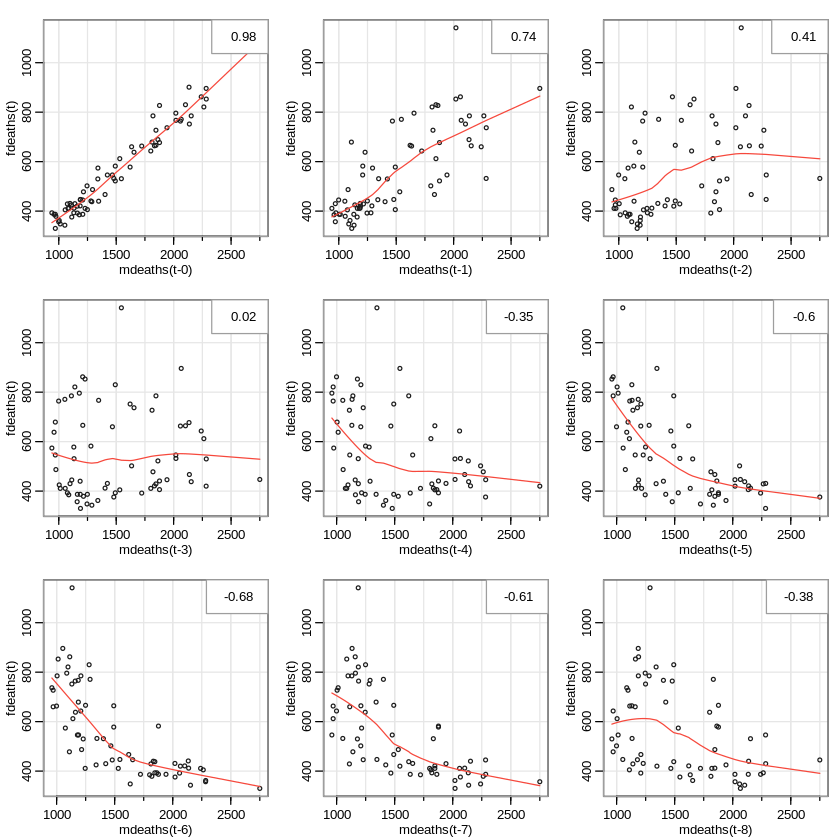

In [5]:
install.packages("astsa")
library(astsa)
lag2.plot(mdeaths, fdeaths, 8)  # 두 시계열의 시차산점도

### 예제 2 (1번에 이어 진행)

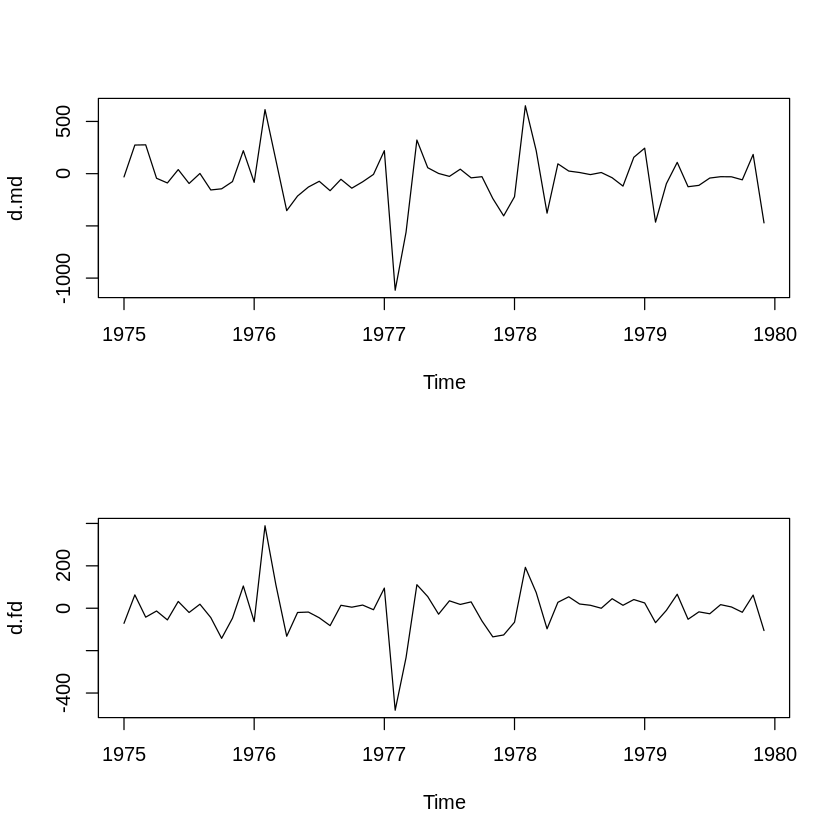

In [6]:
d = ts.intersect(diff(mdeaths, 12), diff(fdeaths, 12))
d.md = d[, 1]
d.fd = d[, 2]

par(mfrow = c(2, 1))
ts.plot(d.md)
ts.plot(d.fd)

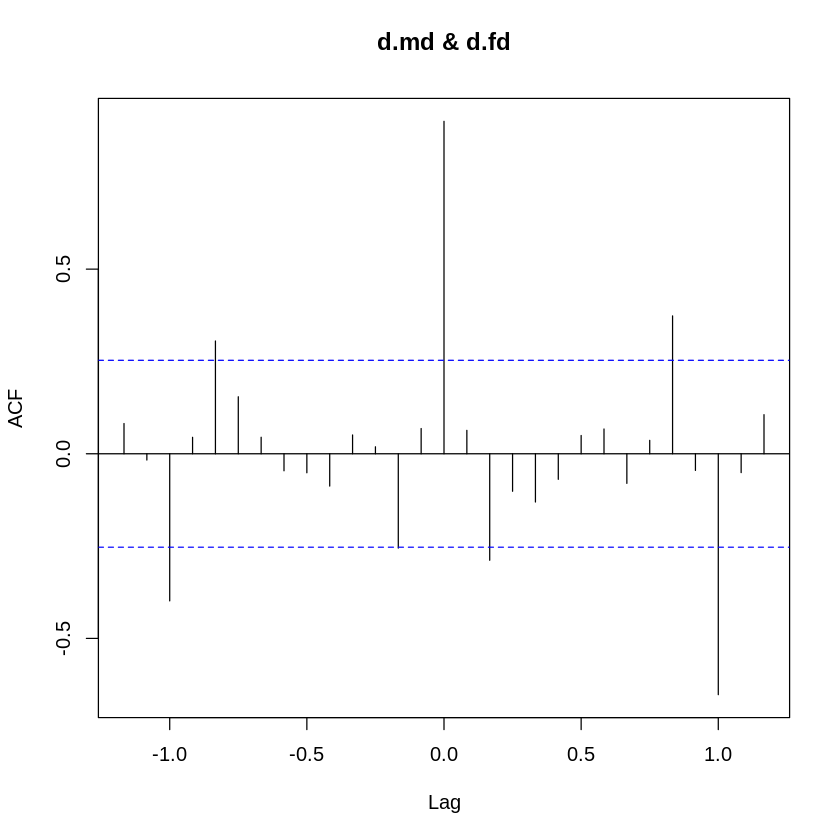

In [7]:
ccf(d.md, d.fd)

+ CCF가 time lag -1(-12), 0(0), 1(12)에서 유의하므로 mdeaths와 fdeaths 간에 동시차의 강한 양의 관계를 가짐을 알 수 있다

### 예제 3

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




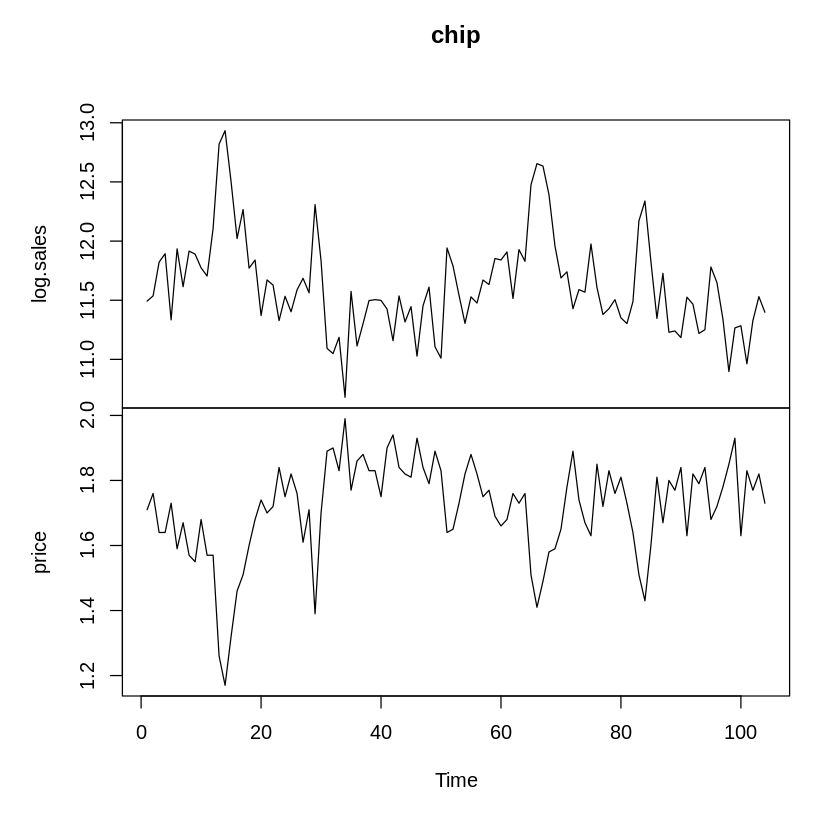

In [8]:
install.packages("TSA")
library(TSA)
data(bluebird)
chip = bluebird
plot(chip)

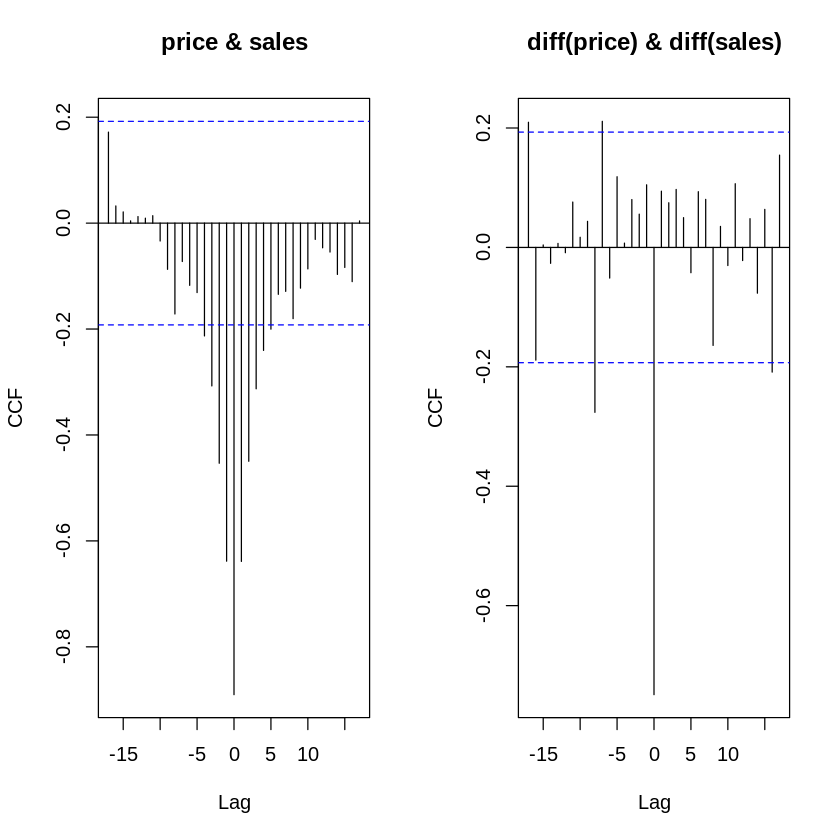

In [9]:
# 차분 전과 후 시계열에 대해 CCF 분석
sales = chip[, 1]
price = chip[, 2]

par(mfrow = c(1, 2))
ccf(y = sales, x = price, ylab = "CCF")
ccf(y = diff(sales), x = diff(price), ylab = "CCF") 

+ 두 시계열 모두 시차가 0일 때 유의하므로 동시차의 price와 sales 간에 강한 음의 관계가 있다고 할 수 있다.
+ 즉, 높은 가격은 낮은 판매와 연관이 있다는 의미이다.


Call:
lm(formula = sales ~ price, data = chip)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54950 -0.12373  0.00667  0.13136  0.45170 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15.890      0.217   73.22   <2e-16 ***
price         -2.489      0.126  -19.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.188 on 102 degrees of freedom
Multiple R-squared:  0.7926,	Adjusted R-squared:  0.7906 
F-statistic: 389.9 on 1 and 102 DF,  p-value: < 2.2e-16


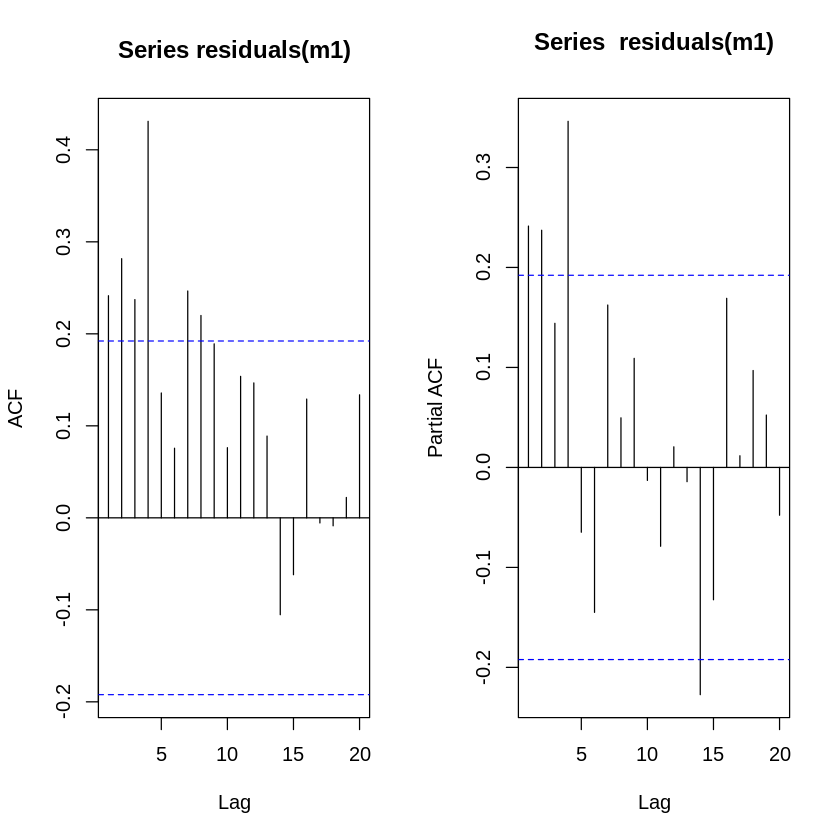

In [10]:
# OLS 회귀 적합과 잔차분석
m1 = lm(sales ~ price, data = chip)
summary(m1)

par(mfrow = c(1, 2))
acf(residuals(m1))
pacf(residuals(m1))

+ ACF는 1, 2, 3, 4 lag에 대해, PACF는 1, 2, 3, 14 lag에 대해 유의하므로 잔차에 자기상관이 존재한다고 할 수 있다.

In [11]:
eacf(residuals(m1))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x o o x x o o o  o  o  o 
1 x o o x o o o o o o o  o  o  o 
2 x x o x o o o o o o o  o  o  o 
3 x x o x o o o o o o o  o  o  o 
4 o x x o o o o o o o o  o  o  o 
5 x x x o x o o o o o o  o  o  o 
6 x x o x x x o o o o o  o  o  o 
7 x o x o o o o o o o o  o  o  o 


+ AR = 1, MA = 4에서 영의 삼각행렬이 만들어지므로 ARMA(1, 4) 모형으로 식별

In [12]:
arima(sales, order = c(1, 0, 4), xreg = data.frame(price))


Call:
arima(x = sales, order = c(1, 0, 4), xreg = data.frame(price))

Coefficients:
         ar1      ma1     ma2     ma3     ma4  intercept    price
      0.1989  -0.0554  0.2521  0.0735  0.5269    15.7792  -2.4234
s.e.  0.1843   0.1660  0.0865  0.1084  0.1376     0.2166   0.1247

sigma^2 estimated as 0.02556:  log likelihood = 42.35,  aic = -70.69

## 7.3 분배(분포)시차모형

In [13]:
# 1, 2, 6 선행시차의 예측변수를 이용한 회귀분석
data.1 = ts.intersect(fdeaths, m.1 = lag(mdeaths, -1), m.2 = lag(mdeaths, -2), m.6 = lag(mdeaths, -6))
r1 = lm(fdeaths ~ m.1 + m.2 + m.6, data = data.1)
summary(r1)


Call:
lm(formula = fdeaths ~ m.1 + m.2 + m.6, data = data.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-156.18  -50.36   -9.11   38.36  433.78 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 501.13512   93.16892   5.379 1.21e-06 ***
m.1           0.31969    0.05023   6.364 2.68e-08 ***
m.2          -0.13151    0.04175  -3.150  0.00251 ** 
m.6          -0.14828    0.03509  -4.226 7.95e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 91.92 on 62 degrees of freedom
Multiple R-squared:  0.7438,	Adjusted R-squared:  0.7314 
F-statistic: 59.99 on 3 and 62 DF,  p-value: < 2.2e-16


In [14]:
# 비교 : 동행시차의 예측변수를 사용한 회귀모형
r2 = lm(fdeaths ~ mdeaths)
summary(r2)


Call:
lm(formula = fdeaths ~ mdeaths)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.344 -33.239  -2.029  23.434 111.971 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -45.25980   16.72648  -2.706  0.00855 ** 
mdeaths       0.40506    0.01075  37.694  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.22 on 70 degrees of freedom
Multiple R-squared:  0.953,	Adjusted R-squared:  0.9524 
F-statistic:  1421 on 1 and 70 DF,  p-value: < 2.2e-16


+ 동행시차의 예측변수를 사용한 경우보다 본 예제의 경우가 성능이 크게 떨어짐을 확인할 수 있다.
+ 다만 본 예제는 문제의 성격에 따라 실제 적용에 유리할 수 있다는 점을 보인다.

### 예제 5. lag() 함수의 활용 예제

#### (a) ts 객체에서의 lag() 함수

In [15]:
set.seed(123)
y = ts(rnorm(10))
x = ts(rnorm(10))
x
class(x)

A Time Series:
 [1]  1.2240818  0.3598138  0.4007715  0.1106827 -0.5558411  1.7869131
 [7]  0.4978505 -1.9666172  0.7013559 -0.4727914

[1] "ts"

In [16]:
lm(y ~ x)
lag(x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
   -0.03609      0.53071  


A Time Series:
 [1]  1.2240818  0.3598138  0.4007715  0.1106827 -0.5558411  1.7869131
 [7]  0.4978505 -1.9666172  0.7013559 -0.4727914

In [17]:
lm(y ~ lag(x))


Call:
lm(formula = y ~ lag(x))

Coefficients:
(Intercept)       lag(x)  
   -0.03609      0.53071  


+  x와 lag(x)에 대한 회귀 결과가 동일하다. 즉, ts 객체에 대해서는 lag()가 lm()에 영향을 미치지 않는다.

#### (b) xts 객체에서의 lag() 함수

In [18]:
install.packages("xts")
library(xts)
yy = xts(y, as.Date(1:10))
xx = xts(x, as.Date(1:10))
xx
class(xx)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




                 [,1]
1970-01-02  1.2240818
1970-01-03  0.3598138
1970-01-04  0.4007715
1970-01-05  0.1106827
1970-01-06 -0.5558411
1970-01-07  1.7869131
1970-01-08  0.4978505
1970-01-09 -1.9666172
1970-01-10  0.7013559
1970-01-11 -0.4727914

[1] "xts" "zoo"

In [19]:
lm(yy ~ xx)


Call:
lm(formula = yy ~ xx)

Coefficients:
(Intercept)           xx  
   -0.03609      0.53071  


In [20]:
lag(xx)
lm(yy ~ lag(xx))

                 [,1]
1970-01-02         NA
1970-01-03  1.2240818
1970-01-04  0.3598138
1970-01-05  0.4007715
1970-01-06  0.1106827
1970-01-07 -0.5558411
1970-01-08  1.7869131
1970-01-09  0.4978505
1970-01-10 -1.9666172
1970-01-11  0.7013559


Call:
lm(formula = yy ~ lag(xx))

Coefficients:
(Intercept)      lag(xx)  
    0.13811      0.02492  


+ 시계열 자료가 한 시차 뒤로 이동했다. 따라서, 1열의 날짜를 통해 lm() 함수가 수행되므로 xx와 lag(xx)에 대한 결과는 다르다.

#### (c) dynlm{dynlm} 함수를 이용

In [21]:
install.packages("dynlm")
library(dynlm)
dynlm(y ~ L(x))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘lmtest’





Time series regression with "ts" data:
Start = 2, End = 10

Call:
dynlm(formula = y ~ L(x))

Coefficients:
(Intercept)         L(x)  
    0.13811      0.02492  


+ dynlm() 함수는 ts 객체에 대해 start와 end를 고려하여 회귀를 수행한다.
+ 이는 날짜 기반의 매칭을 수행할 수 있고, xts 객체에 대해 lm()을 수행한 결과와 동일하다.

## 7.4 동적회귀모형

### 예제 6. 동적모형

In [22]:
install.packages("dynlm")
data("UKDriverDeaths", package = "datasets")
uk = log10(UKDriverDeaths)
dfm0 = dynlm(uk ~ L(uk, 1) + L(uk, 12))
dfm0

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Time series regression with "ts" data:
Start = 1970(1), End = 1984(12)

Call:
dynlm(formula = uk ~ L(uk, 1) + L(uk, 12))

Coefficients:
(Intercept)     L(uk, 1)    L(uk, 12)  
     0.1826       0.4310       0.5112  



Time series regression with "ts" data:
Start = 1975(1), End = 1982(12)

Call:
dynlm(formula = uk ~ L(uk, 1) + L(uk, 12), start = c(1975, 1), 
    end = c(1982, 12))

Coefficients:
(Intercept)     L(uk, 1)    L(uk, 12)  
     0.5418       0.2072       0.6228  


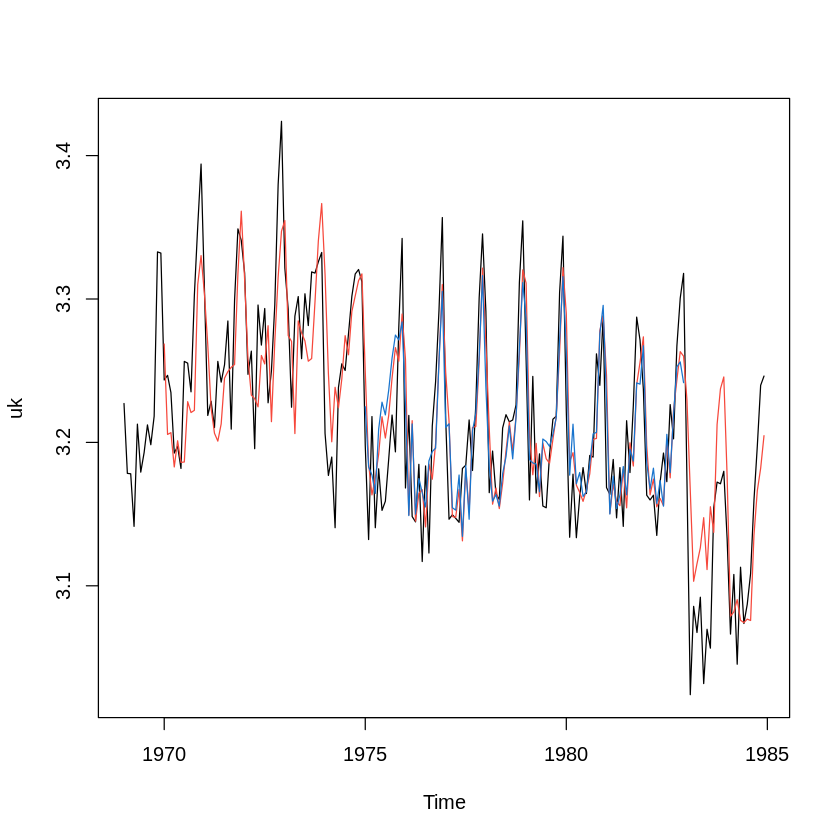

In [23]:
dfm2 = dynlm(uk ~ L(uk, 1) + L(uk, 12), start = c(1975, 1), end = c(1982, 12))
dfm2

plot(uk)
lines(fitted(dfm0), col = 2)
lines(fitted(dfm2), col = 4)

In [24]:
dfm3 = dynlm(uk ~ L(uk, c(1, 11, 12)), start = c(1975, 1), end = c(1982, 12))
anova(dfm2, dfm3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,93,0.1359793,NA,NA,NA,NA
2,92,0.1325311,1,0.003448141,2.393618,0.1252645


### 예제 7. 동적회귀모형

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sandwich’, ‘Formula’




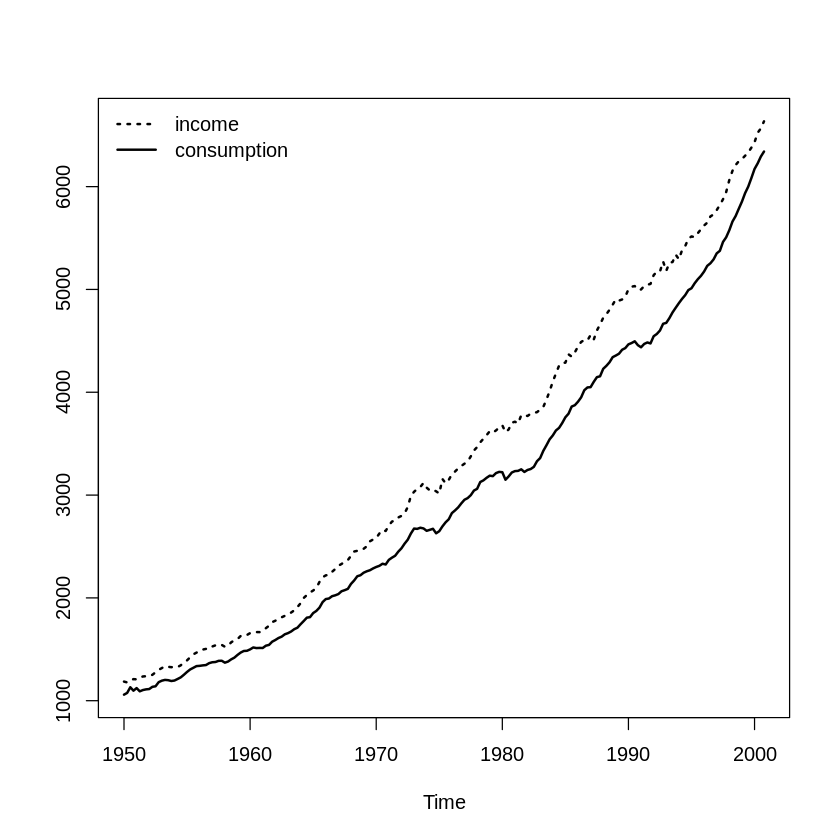

In [25]:
install.packages("AER")
library("dynlm")
data("USMacroG", package = "AER")
plot(USMacroG[, c("dpi", "consumption")], lty = c(3, 1), lwd = 2, plot.type = "single", ylab = "")
legend("topleft", legend = c("income", "consumption"), lwd = 2, lty = c(3, 1), bty = "n")

In [26]:
lm = dynlm(consumption ~ dpi + L(consumption), data = USMacroG)
lm1 = dynlm(consumption ~ dpi + L(dpi), data = USMacroG)
summary(lm)
summary(lm1)


Time series regression with "ts" data:
Start = 1950(2), End = 2000(4)

Call:
dynlm(formula = consumption ~ dpi + L(consumption), data = USMacroG)

Residuals:
     Min       1Q   Median       3Q      Max 
-101.303   -9.674    1.141   12.691   45.322 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.535216   3.845170   0.139    0.889    
dpi            -0.004064   0.016626  -0.244    0.807    
L(consumption)  1.013111   0.018161  55.785   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.52 on 200 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 4.627e+05 on 2 and 200 DF,  p-value: < 2.2e-16



Time series regression with "ts" data:
Start = 1950(2), End = 2000(4)

Call:
dynlm(formula = consumption ~ dpi + L(dpi), data = USMacroG)

Residuals:
    Min      1Q  Median      3Q     Max 
-190.02  -56.68    1.58   49.91  323.94 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -81.07959   14.50814  -5.589 7.43e-08 ***
dpi           0.89117    0.20625   4.321 2.45e-05 ***
L(dpi)        0.03091    0.20754   0.149    0.882    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87.58 on 200 degrees of freedom
Multiple R-squared:  0.9964,	Adjusted R-squared:  0.9964 
F-statistic: 2.785e+04 on 2 and 200 DF,  p-value: < 2.2e-16


In [27]:
deviance(lm)
deviance(lm1)

[1] 92644.15

[1] 1534001

+ lm(동적회귀모형)이 lm1(분포시차모형)보다 다소 우수함

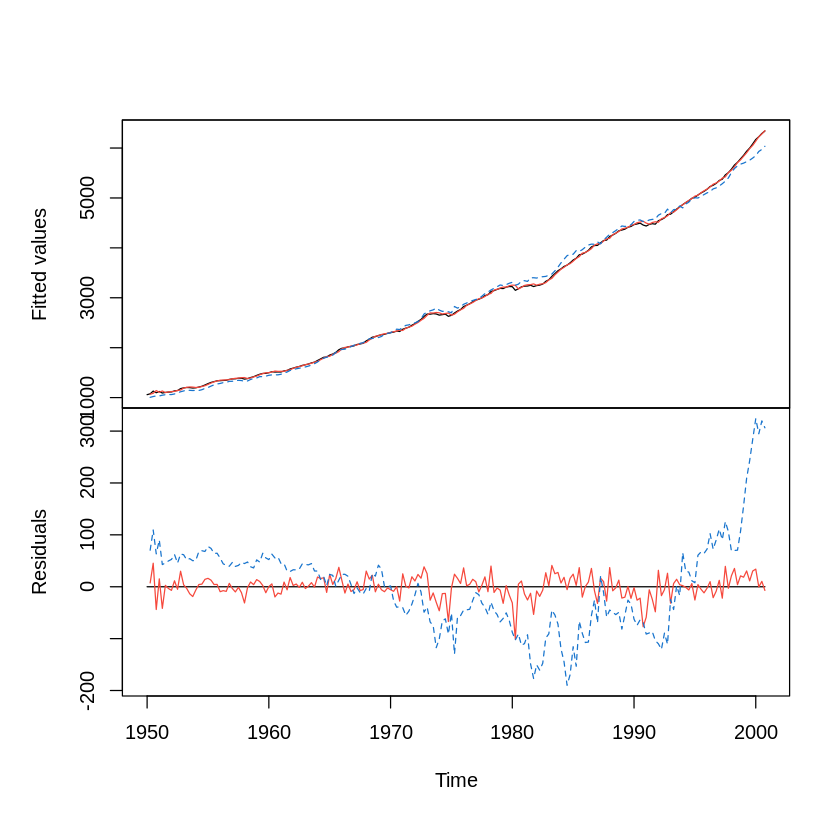

In [28]:
plot(merge(as.zoo(USMacroG[, "consumption"]), fitted(lm), fitted(lm1), 0, residuals(lm), residuals(lm1)),
     screens = rep(1:2, c(3, 3)), col = rep(c(1, 2, 4), 2), lty = rep(c(1, 1, 2), 2), 
     xlab = "Time", ylab = c("Fitted values", "Residuals"), main = "")
legend(1950, 6500, c("observed", "lm", "lm1"), col = c(1, 2, 4), lty = c(1, 1, 2), bty = "n")